In [2]:
import solution_crosser
import solution_generator
import table_placer
import CONST
from graph import RoomGraph
import loader
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def graph_to_heatmap(graph:RoomGraph):
    shape = (max(graph.walls, key=lambda x: x[0])[0] + 1, max(graph.walls, key=lambda x: x[1])[1] + 1)
    heatmap = [[0 for _ in range(shape[1])] for _ in range(shape[0])]
    for wall in graph.walls:
        heatmap[wall[0]][wall[1]] = 1
    for door in graph.doors:
        heatmap[door[0]][door[1]] = 2
    for table in graph.tables:
        heatmap[table[0]][table[1]] = 3
    for chair in graph.chairs:
        heatmap[chair[0]][chair[1]] = 4
    
    return heatmap

graph = loader.load_grid("grids_solutions/grid_test")
print(graph.tables)
heatmap = graph_to_heatmap(graph)


    

{(7, 17), (10, 43), (2, 39), (16, 38), (7, 35), (5, 10), (5, 28), (3, 49), (13, 17), (16, 13), (7, 10), (17, 51), (11, 44), (5, 3), (10, 54), (2, 50), (12, 18), (5, 21), (4, 23), (3, 33), (4, 32), (6, 4), (10, 29), (9, 3), (14, 17), (11, 9), (5, 23), (8, 25), (17, 46), (9, 42), (11, 2), (3, 28), (4, 27), (14, 37), (12, 49), (8, 36), (7, 16), (10, 42), (9, 44), (5, 9), (11, 4), (4, 29), (10, 8), (13, 16), (15, 13), (16, 12), (7, 9), (17, 50), (10, 44), (11, 43), (2, 40), (6, 22), (2, 49), (12, 17), (4, 22), (16, 51), (16, 5), (13, 18), (9, 30), (11, 36), (5, 4), (9, 2), (14, 16), (15, 36), (10, 3), (15, 54), (4, 33), (11, 11), (10, 21), (10, 30), (17, 45), (6, 8), (15, 38), (3, 18), (14, 18), (16, 37), (16, 46), (8, 17), (5, 27), (8, 26), (8, 35), (6, 10), (9, 43), (7, 36), (10, 53), (4, 28), (3, 32), (5, 29), (6, 3), (3, 50), (11, 42), (6, 21), (12, 16), (4, 21), (16, 50), (10, 9), (11, 8), (5, 22), (16, 4), (9, 29), (11, 35), (6, 23), (10, 2), (9, 4), (10, 11), (3, 27), (14, 36), (15,

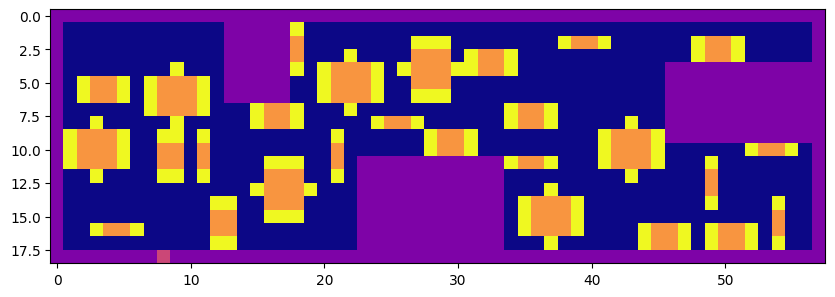

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(heatmap, cmap="plasma", interpolation='nearest')

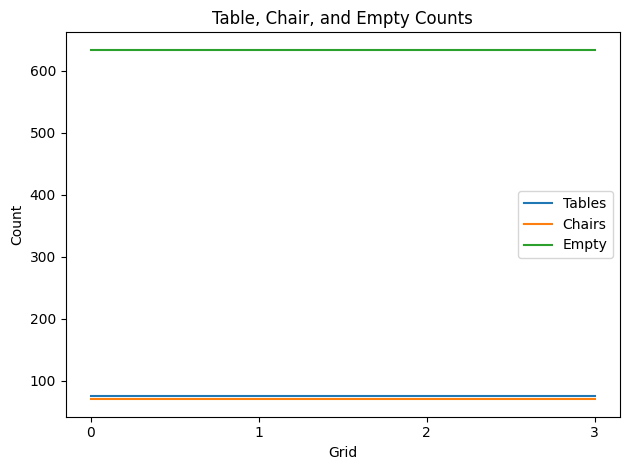

In [49]:
#file_list: list of file names
def graph_stats(file_list):
    graph_list = []
    for file in file_list:
        graph_list.append(loader.load_grid(file))
    table_count = []
    chair_count = []
    empty_count = []
    for graph in graph_list:
        area = (max(graph.walls, key=lambda x: x[0])[0] + 1)*(max(graph.walls, key=lambda x: x[1])[1] + 1)
        table_count.append(len(graph.tables))
        chair_count.append(len(graph.chairs))
        empty_count.append(area - len(graph.tables) - len(graph.chairs) - len(graph.walls) - len(graph.doors))
    fig, ax = plt.subplots()
    index = np.arange(len(file_list))
    ax.plot(index, table_count, label='Tables')
    ax.plot(index, chair_count, label='Chairs')
    ax.plot(index, empty_count, label='Empty')
    plt.xlabel('Grid')
    plt.ylabel('Count')
    plt.title('Table, Chair, and Empty Counts')
    plt.xticks(index)
    plt.legend()
    plt.tight_layout()
    plt.show()

#example usage
f_list = ["grids_solutions/sol_grid0", "grids_solutions/sol_grid1", "grids_solutions/sol_grid2", "grids_solutions/sol_grid3"]
graph_stats(f_list)



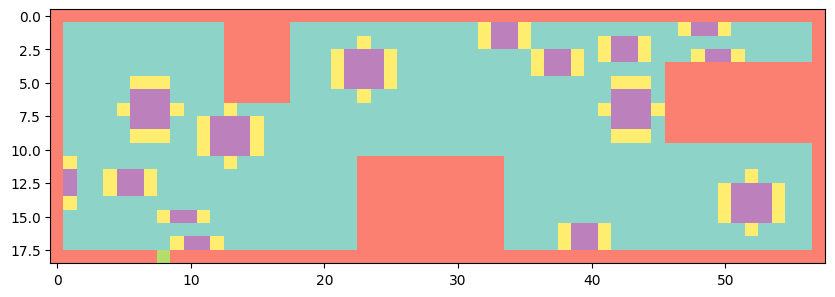

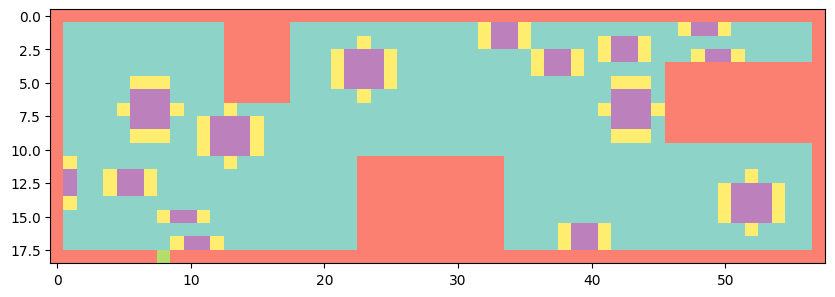

In [50]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
def animate_evolution(file_list):
    plt.ion()
    graph_list = []
    for file in file_list:
        graph_list.append(loader.load_grid(file))
    heatmap_list = []
    for graph in graph_list:
        heatmap_list.append(graph_to_heatmap(graph))
    fig, ax = plt.subplots(figsize=(10, 10))
    for heatmap in heatmap_list:
        ax.imshow(heatmap, cmap="Set3", interpolation='nearest')
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1.0)



f_list = ["grids_solutions/sol_grid0", "grids_solutions/sol_grid1", "grids_solutions/sol_grid2", "grids_solutions/sol_grid3"]
animate_evolution(f_list)

### Finding best solutions

In [36]:
def graph_process(stats):
    chair_count = []
    times = []
    for i in range(len(stats)):
        chair_count.append(len(stats[i]['best'].chairs))
        times.append(stats[i]['time'])

    # fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    fix, ax = plt.subplots(figsize=(7, 7))
    steps = np.arange(len(stats))

    ax.plot(steps, chair_count)
    ax.set_xlabel('step')
    ax.set_ylabel('chairs')
    ax.set_title('Best subject chairs count in each step')
    ax.set_xticks(steps)
    plt.show()

    fix, ax = plt.subplots()
    steps = np.arange(len(stats))
    ax.plot(steps, times, color='red')
    ax.set_xlabel('step')
    ax.set_ylabel('duration (s)')
    ax.set_title('Duration of each step')
    ax.set_xticks(steps)
    plt.tight_layout()
    plt.show()

def show_grid(grid, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    heatmap = graph_to_heatmap(grid)
    ax.imshow(heatmap, cmap="plasma", interpolation='nearest')
    plt.title(title)
    plt.show()

In [6]:
from solution_finder import find_solutions
from loader import load_grid


def show_process(initial_grid, stats):
    show_grid(graph, 'initial grid')
    graph_process(stats)
    show_grid(stats[-1]['best'], 'best solution')

### grids_empty/grid1

In [44]:
PATH = 'grids_empty/random_grid'
POPULATION_SIZE = 10
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph10 = load_grid(PATH)
stats10 = find_solutions(graph, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [10  5] no path to:  (11, 7)
-------------------------------------------------------------------
step 0 took 0.63s
best solution: 96
-------------------------------------------------------------------
-------------------------------------------------------------------
step 1 took 0.61s
best solution: 102
-------------------------------------------------------------------
-------------------------------------------------------------------
step 2 took 0.85s
best solution: 110
-------------------------------------------------------------------
-------------------------------------------------------------------
step 3 took 0.78s
best solution: 116
-------------------------------------------------------------------
-------------------------------------------------------------------
step 4 took 1.25s
best solution: 128
-------------------------------------------------------------------
-------------------------------------------------------------------
step 5 took 1.81s
best s

In [39]:
PATH = 'grids_empty/random_grid'
POPULATION_SIZE = 50
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph50 = load_grid(PATH)
stats50 = find_solutions(graph, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [3 1] no path to:  (4, 4)
for placment:  [10  5] no path to:  (11, 7)
for placment:  [15 15] no path to:  (15, 17)
for placment:  [10  5] no path to:  (11, 7)
for placment:  [ 7 28] no path to:  (9, 28)
for placment:  [10  5] no path to:  (11, 7)
for placment:  [2 1] no path to:  (20, 8)
for placment:  [ 2 27] no path to:  (1, 28)
for placment:  [ 6 27] no path to:  (8, 27)
for placment:  [15 15] no path to:  (15, 17)
-------------------------------------------------------------------
step 0 took 4.55s
best solution: 96
-------------------------------------------------------------------
for placment:  [1 6] no path to:  (1, 5)
-------------------------------------------------------------------
step 1 took 4.64s
best solution: 104
-------------------------------------------------------------------
-------------------------------------------------------------------
step 2 took 6.50s
best solution: 112
-------------------------------------------------------------------
----

In [41]:
PATH = 'grids_empty/random_grid'
POPULATION_SIZE = 100
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph100 = load_grid(PATH)
stats100 = find_solutions(graph, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [2 1] no path to:  (6, 18)
for placment:  [28  2] no path to:  (28, 1)
for placment:  [ 6 27] no path to:  (8, 27)
for placment:  [ 6 27] no path to:  (8, 27)
for placment:  [15 15] no path to:  (15, 17)
for placment:  [7 8] no path to:  (9, 8)
for placment:  [ 2 27] no path to:  (1, 28)
for placment:  [13  9] no path to:  (11, 10)
-------------------------------------------------------------------
step 0 took 10.42s
best solution: 102
-------------------------------------------------------------------
-------------------------------------------------------------------
step 1 took 8.95s
best solution: 108
-------------------------------------------------------------------
for placment:  [ 4 27] no path to:  (6, 27)
-------------------------------------------------------------------
step 2 took 9.95s
best solution: 120
-------------------------------------------------------------------
-------------------------------------------------------------------
step 3 took 10.48s


In [55]:
#chairs
def plot_chairs(stats10, stats50, stats100):
    chair_count_10 = []
    chair_count_50 = []
    chair_count_100 = []
    for i in range(len(stats)):
        chair_count_10.append(len(stats10[i]['best'].chairs))
        chair_count_50.append(len(stats50[i]['best'].chairs))
        chair_count_100.append(len(stats100[i]['best'].chairs))
    fix, ax = plt.subplots()
    steps = np.arange(len(stats))

    ax.plot(steps, chair_count_10, label='population: 10')
    ax.plot(steps, chair_count_50, label='population: 50')
    ax.plot(steps, chair_count_100, label='population: 100')
    ax.set_xlabel('step')
    ax.set_ylabel('chairs')
    ax.set_title('Best subject chairs count in each step')
    ax.set_xticks(steps)
    plt.legend()
    plt.show()

In [56]:
def plot_times(stats10, stats50, stats100):
    times_10 = []
    times_50 = []
    times_100 = []
    for i in range(len(stats10)):
        times_10.append(stats10[i]['time'])
        times_50.append(stats50[i]['time'])
        times_100.append(stats100[i]['time'])
    fix, ax = plt.subplots()
    steps = np.arange(len(stats10))

    ax.plot(steps, times_10, label='population: 10')
    ax.plot(steps, times_50, label='population: 50')
    ax.plot(steps, times_100, label='population: 100')
    ax.set_xlabel('step')
    ax.set_ylabel('duration (s)')
    ax.set_title('Duration of each step')
    ax.set_xticks(steps)
    plt.legend()
    plt.show()

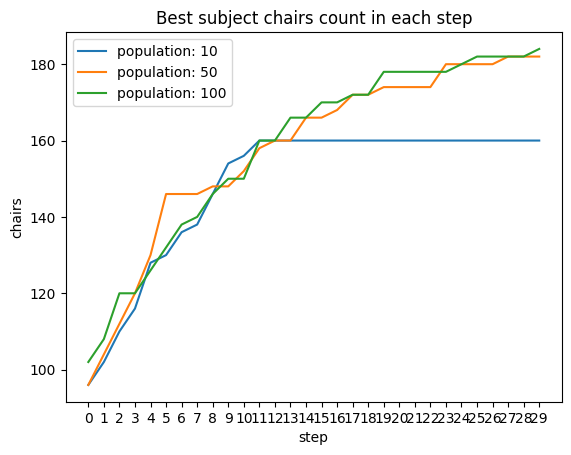

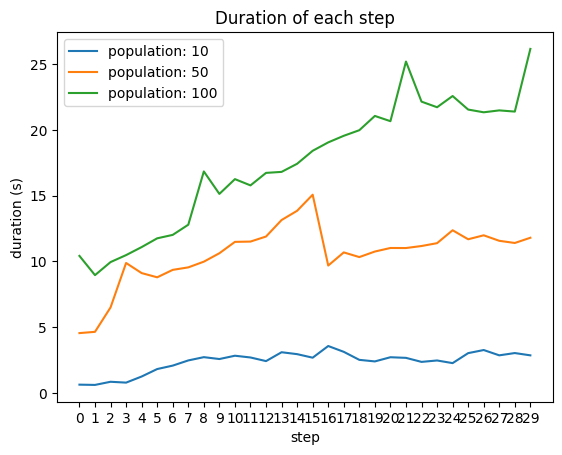

In [58]:
plot_chairs(stats10, stats50, stats100)
plot_times(stats10, stats50, stats100)

In [60]:
PATH = 'grids_empty/random_grid20'
POPULATION_SIZE = 100
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph100_20 = load_grid(PATH)
stats100_20 = find_solutions(graph100_20, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [18 10] no path to:  (18, 9)
for placment:  [18 10] no path to:  (18, 9)
for placment:  [18 10] no path to:  (18, 9)
for placment:  [18 10] no path to:  (18, 9)
for placment:  [5 2] no path to:  (14, 4)
for placment:  [2 2] no path to:  (16, 13)
-------------------------------------------------------------------
step 0 took 2.83s
best solution: 54
-------------------------------------------------------------------
for placment:  [2 5] no path to:  (7, 5)
-------------------------------------------------------------------
step 1 took 3.03s
best solution: 56
-------------------------------------------------------------------
for placment:  [2 5] no path to:  (6, 12)
-------------------------------------------------------------------
step 2 took 3.21s
best solution: 60
-------------------------------------------------------------------
for placment:  [18 10] no path to:  (18, 9)
for placment:  [2 5] no path to:  (12, 16)
for placment:  [ 1 12] no path to:  (1, 15)
for placm

In [61]:
PATH = 'grids_empty/random_grid20'
POPULATION_SIZE = 50
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph50_20 = load_grid(PATH)
stats50_20 = find_solutions(graph50_20, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [2 2] no path to:  (6, 18)
-------------------------------------------------------------------
step 0 took 1.56s
best solution: 54
-------------------------------------------------------------------
-------------------------------------------------------------------
step 1 took 1.59s
best solution: 56
-------------------------------------------------------------------
-------------------------------------------------------------------
step 2 took 1.71s
best solution: 62
-------------------------------------------------------------------
for placment:  [18 10] no path to:  (18, 9)
-------------------------------------------------------------------
step 3 took 1.77s
best solution: 66
-------------------------------------------------------------------
for placment:  [2 5] no path to:  (12, 4)
for placment:  [18 10] no path to:  (18, 9)
-------------------------------------------------------------------
step 4 took 2.07s
best solution: 66
------------------------------------

In [62]:
PATH = 'grids_empty/random_grid20'
POPULATION_SIZE = 10
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph10_20 = load_grid(PATH)
stats10_20 = find_solutions(graph10_20, POPULATION_SIZE, STEPS, TABLE_SPECS)

-------------------------------------------------------------------
step 0 took 0.15s
best solution: 44
-------------------------------------------------------------------
-------------------------------------------------------------------
step 1 took 0.20s
best solution: 50
-------------------------------------------------------------------
-------------------------------------------------------------------
step 2 took 0.20s
best solution: 50
-------------------------------------------------------------------
-------------------------------------------------------------------
step 3 took 0.21s
best solution: 52
-------------------------------------------------------------------
-------------------------------------------------------------------
step 4 took 0.20s
best solution: 54
-------------------------------------------------------------------
-------------------------------------------------------------------
step 5 took 0.19s
best solution: 56
------------------------------------

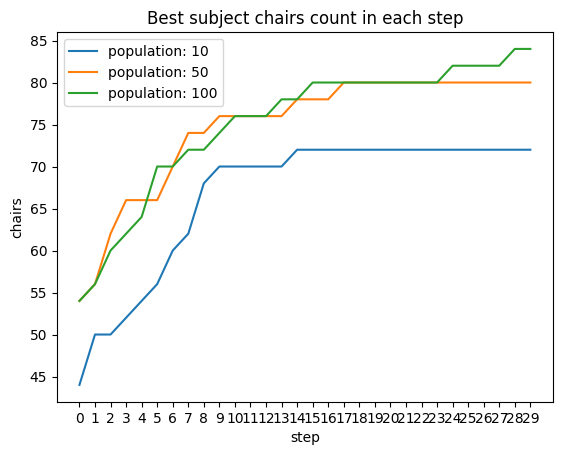

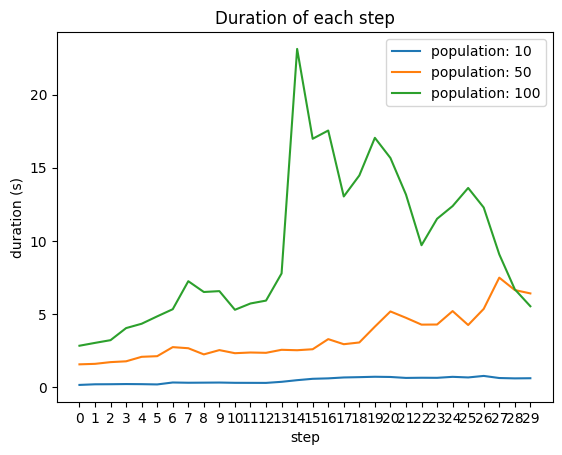

In [63]:
plot_chairs(stats10_20, stats50_20, stats100_20)
plot_times(stats10_20, stats50_20, stats100_20)

In [64]:
PATH = 'grids_empty/random_grid10'
POPULATION_SIZE = 100
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph100_10 = load_grid(PATH)
stats100_10 = find_solutions(graph100_10, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [2 1] no path to:  (8, 4)
for placment:  [3 1] no path to:  (8, 4)
for placment:  [3 1] no path to:  (2, 4)
for placment:  [2 1] no path to:  (2, 4)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [2 8] no path to:  (1, 8)
for placment:  [3 1] no path to:  (4, 4)
for placment:  [2 1] no path to:  (4, 4)
for placment:  [2 8] no path to:  (1, 8)
for placment:  [2 1] no path to:  (4, 4)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [2 1] no path to:  (8, 4)
for placment:  [3 1] no path to:  (8, 4)
for placment:  [2 1] no path to:  (8, 4)
for placment:  [2 8] no path to:  (1, 8)
for placment:  [2 1] no path to:  (8, 4)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [3 1] no path to:  (3, 8)
for placment:  [

In [65]:
PATH = 'grids_empty/random_grid10'
POPULATION_SIZE = 50
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph50_10 = load_grid(PATH)
stats50_10 = find_solutions(graph50_10, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [2 1] no path to:  (3, 8)
for placment:  [3 1] no path to:  (3, 8)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [2 8] no path to:  (1, 8)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [2 1] no path to:  (7, 4)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [2 1] no path to:  (7, 4)
for placment:  [2 1] no path to:  (4, 8)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [2 1] no path to:  (2, 4)
for placment:  [2 1] no path to:  (4, 5)
for placment:  [

In [66]:
PATH = 'grids_empty/random_grid10'
POPULATION_SIZE = 10
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph10_10 = load_grid(PATH)
stats10_10 = find_solutions(graph10_10, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [2 1] no path to:  (4, 4)
for placment:  [3 1] no path to:  (5, 5)
for placment:  [2 1] no path to:  (5, 5)
for placment:  [2 8] no path to:  (1, 8)
for placment:  [2 1] no path to:  (5, 5)
for placment:  [2 8] no path to:  (1, 8)
for placment:  [3 1] no path to:  (5, 5)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 3] no path to:  (8, 2)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [8 2] no path to:  (8, 1)
for placment:  [3 1] no path to:  (3, 4)
for placment:  [2 1] no path to:  (3, 4)
for placment:  [2 1] no path to:  (5, 5)
for placment:  [2 1] no path to:  (5, 5)
for placment:  [3 1] no path to:  (7, 7)
for placment:  [3 1] no path to:  (5, 5)
for placment:  [8 4] no path to:  (8, 3)
for placment:  [2 1] no path to:  (4, 4)
for placment:  [3 1] no path to:  (4, 4)
for placment:  [2 1] no path to:  (8, 4)
for placment:  [3 1] no path to:  (8, 4)
for placment:  [

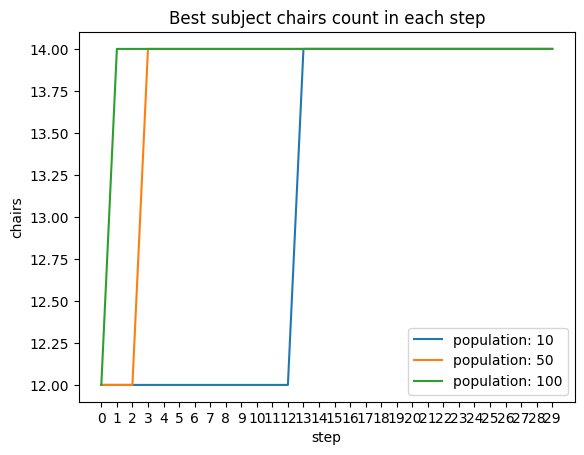

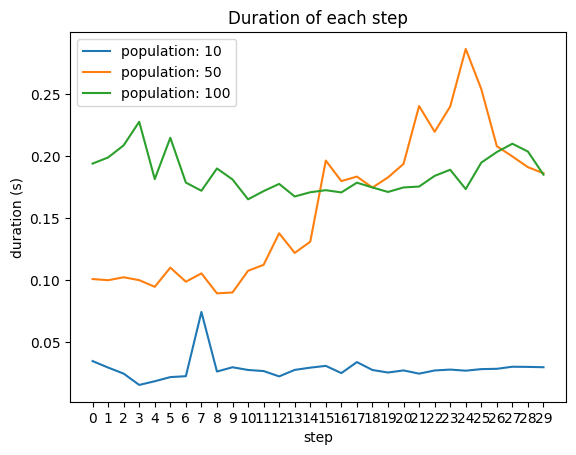

In [69]:
plot_chairs(stats10_10, stats50_10, stats100_10)
plot_times(stats10_10, stats50_10, stats100_10)

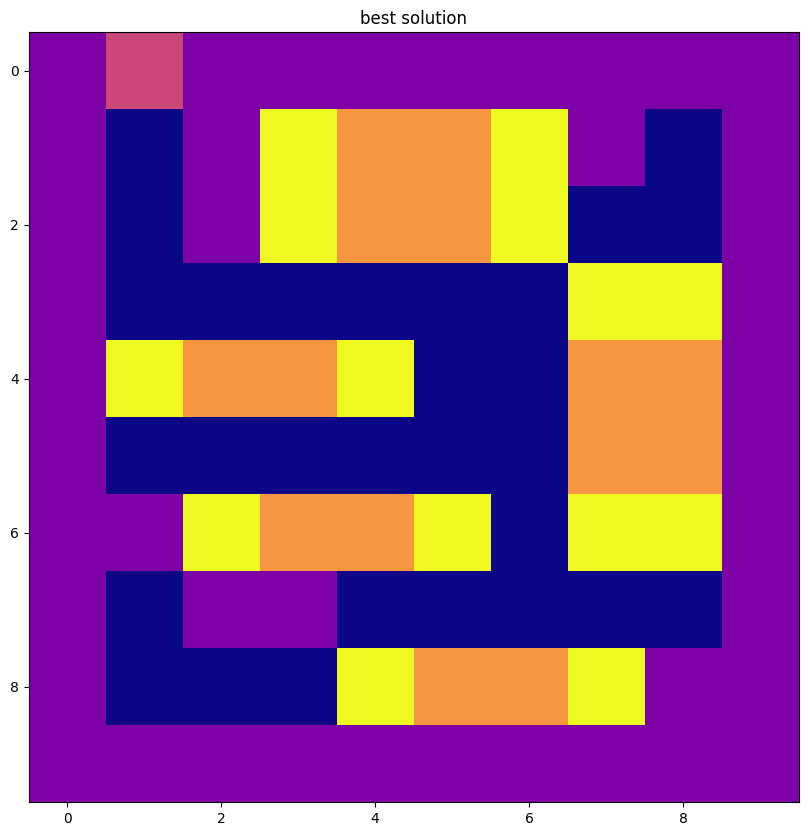

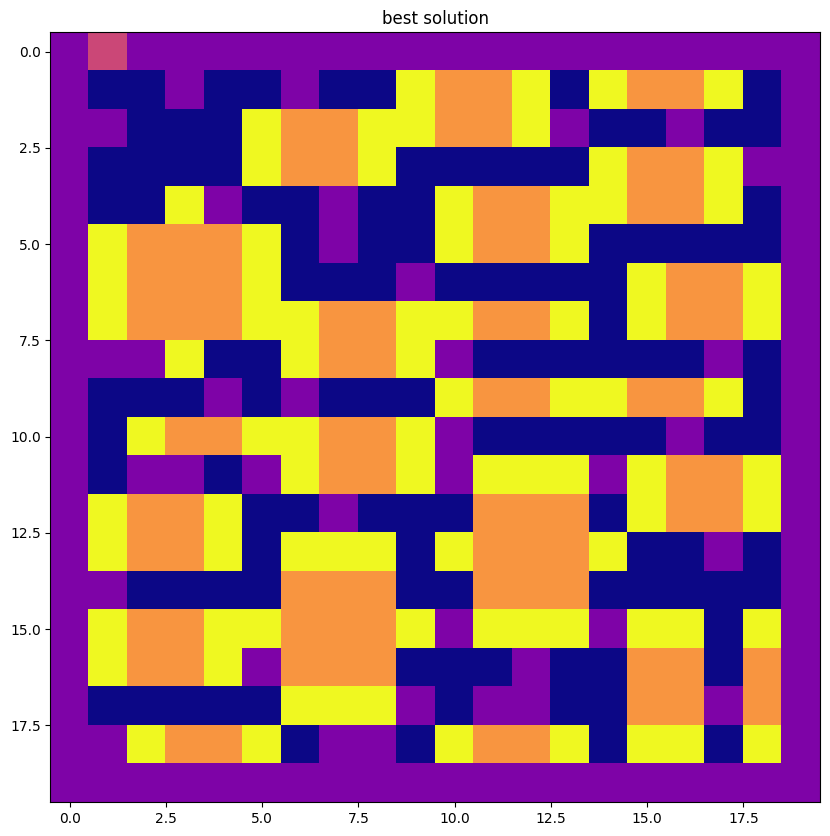

In [71]:
show_grid(stats100_10[-1]['best'], 'best solution')
show_grid(stats100_20[-1]['best'], 'best solution')